Text(0, 0.5, 'Vekt')

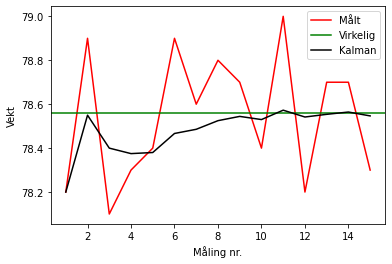

In [35]:
import matplotlib.pyplot as plt
import numpy as np

actual_weight = 78.56
weight_measurements = [78.2,78.9,78.1,78.3,78.4,78.9,78.6, 78.8,78.7,78.4,79,78.2,78.7,78.7,78.3]
kalman_est = [78.5] # Initialisation

for i, n in enumerate(weight_measurements):
    x = kalman_est[i] + (1/(i+1))*(n-kalman_est[i])
    kalman_est.append(x)
del kalman_est[0]

plt.plot(range(1,1+len(weight_measurements)), weight_measurements, color='red', label= "Målt")
plt.axhline(y=actual_weight, color='green', label= "Virkelig")
plt.plot(range(1,1+len(kalman_est)), kalman_est, color='black', label= "Kalman")
plt.legend()
plt.xlabel('Måling nr.')
plt.ylabel('Vekt')

Text(0, 0.5, 'Position')

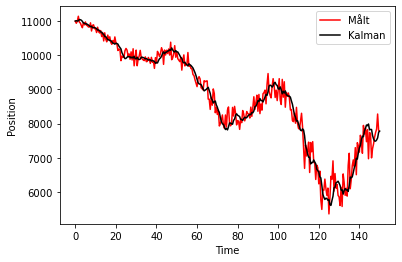

In [36]:
measurements = []
kalman_pos_est = [10990]
kalman_vel_est = [20]
pos_init = 11000
vel_init = -20
alpha = 0.2
beta = 0.04



with open('noisy_position.txt') as f:
    f.readline()
    for line in f:
        measurements.append(int(line.strip().split()[1]))

for i, n in enumerate(measurements):
    pos_upd = kalman_pos_est[i] + alpha*(n-kalman_pos_est[i])
    vel_upd = kalman_vel_est[i] + beta*((n-kalman_pos_est[i])/0.5)

    pos_est = pos_upd + 0.5*vel_upd
    vel_est = vel_upd

    kalman_pos_est.append(pos_est)
    kalman_vel_est.append(vel_est)

plt.plot(np.arange(0.0, float(len(measurements)/2), 0.5), measurements, color='red', label= "Målt")
plt.plot(np.arange(0.0, float(len(kalman_pos_est)/2), 0.5), kalman_pos_est, color='black', label= "Kalman")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')